In [ ]:
# Student Name - Id - section
# Hasna Othman Bukhari - 2005230 - EAR
# Kawther Kamal Aldhahri - 2006802 - EAR

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats
import scipy.sparse as sp
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
import seaborn as sns

In [3]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read File
file_path = '/content/drive/My Drive/mushrooms.csv'
data = pd.read_csv(file_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [7]:
X = data.drop('class', axis=1)
y = data['class']

In [8]:
# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data using preprocessing pipeline
X_preprocessed = preprocessing_pipeline.fit_transform(X)

In [9]:
# Split data into testing and training sets (X, y)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [10]:
# Perform k-fold cross-validation for both training and testing
# Initialize k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []


for train_index, test_index in kfold.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Preprocess training data for the current fold
    X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train_fold)

    # Preprocess testing data for the current fold (using the same preprocessing as training)
    X_test_preprocessed = preprocessing_pipeline.transform(X_test_fold)

    # Create and train the Random Forest model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)

    # Predict on training fold
    y_pred_train = rf.predict(X_train_preprocessed)

    # Calculate accuracy for training fold
    accuracy_train = accuracy_score(y_train_fold, y_pred_train)
    train_accuracies.append(accuracy_train)

    # Predict on testing fold
    y_pred_test = rf.predict(X_test_preprocessed)

    # Calculate accuracy for testing fold
    accuracy_test = accuracy_score(y_test_fold, y_pred_test)
    test_accuracies.append(accuracy_test)
    print(f"Iteration {len(test_accuracies)}: Training Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}")

Iteration 1: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 2: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 3: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 4: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 5: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 6: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 7: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 8: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 9: Training Accuracy: 1.0000, Test Accuracy: 1.0000
Iteration 10: Training Accuracy: 1.0000, Test Accuracy: 1.0000


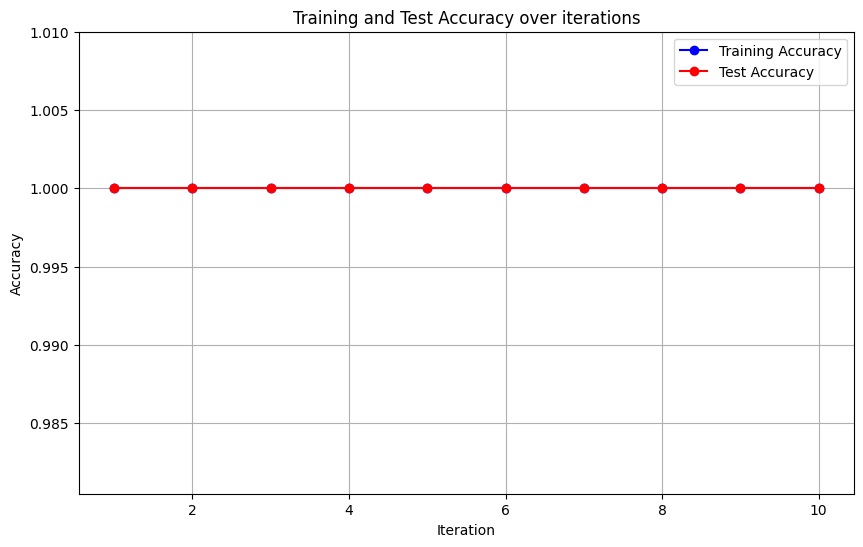

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.ylim(0.9805, 1.01)
plt.title('Training and Test Accuracy over iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Train the Random Forest model on the entire training set
rf_final = RandomForestClassifier(random_state=42)
rf_final.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Print the final average validation accuracy
final_val_accuracy = np.mean(test_accuracies)
print(f"\nAverage Validation Accuracy: {final_val_accuracy:.4f}")
# Predict on the test set
y_pred_test = rf_final.predict(X_test)


Average Validation Accuracy: 1.0000


In [14]:
# Test the Random Forest model
y_pred = rf.predict(X_test)

In [15]:

# Calculate and print the final test accuracy
final_test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Test Accuracy: {final_test_accuracy:.4f}")
# Report the model evaluation
report = classification_report(y_test, y_pred_test)
print("\nClassification Report:\n", report)

Final Test Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



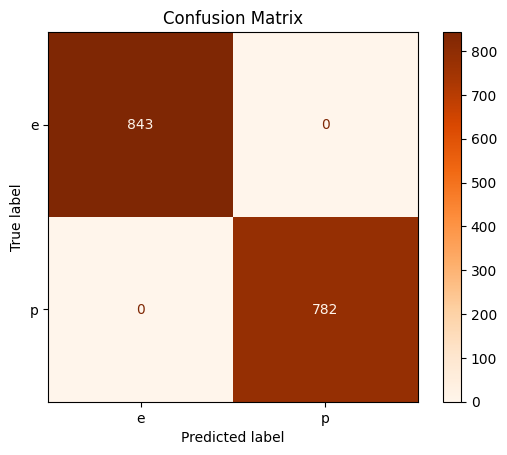

In [16]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Create a figure and axis to plot the confusion matrix
fig, ax = plt.subplots()

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='Oranges', ax=ax)
ax.set_title('Confusion Matrix')
# Show the plot
plt.show()